In [2]:

%load_ext autoreload
%autoreload 2
import warnings; warnings.filterwarnings("ignore") 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
%matplotlib inline

from openquake.hazardlib.geo import (
    Point, Line, PlanarSurface, MultiSurface, SimpleFaultSurface,
    ComplexFaultSurface, RectangularMesh
)

import numpy
from matplotlib import pyplot
from mpl_toolkits.basemap import Basemap

In [58]:
def get_grid_and_map_proj(surf, buf=0.3, delta=0.001):
    """
    Return grid of nodes and map projection specific to surface
    """
    min_lon, max_lon, max_lat, min_lat = surf.get_bounding_box()
    
    min_lon -= buf
    max_lon += buf
    min_lat -= buf
    max_lat += buf

    lons = numpy.arange(min_lon, max_lon + delta, delta)
    lats = numpy.arange(min_lat, max_lat + delta, delta)
    lons, lats = numpy.meshgrid(lons, lats)
    mesh = RectangularMesh(lons=lons, lats=lats, depths=None)
    
    m = Basemap(projection='merc', llcrnrlat=numpy.min(lats), urcrnrlat=numpy.max(lats),
                llcrnrlon=numpy.min(lons), urcrnrlon=numpy.max(lons), resolution='l')
    
    return mesh, m

In [59]:
# define planar surface
surf= PlanarSurface(
    strike=3., dip=40.,
    top_left = Point(depth=2.0, latitude=36.539, longitude=137.874),
    top_right = Point(depth=2.0, latitude=36.7680117889, longitude=137.888982562),
    bottom_left = Point(depth=14.8557521937, latitude=36.5316665297, longitude=138.045238973),
    bottom_right = Point(depth=14.8557521937, latitude=36.7606772927, longitude=138.060731463)
)

# get grid of points for which to calculate distances and associated map projection
mesh, m = get_grid_and_map_proj(surf)
x, y = m(mesh.lons, mesh.lats)
x

array([[    0.        ,   111.19487429,   222.38974857, ...,
        87287.97631389, 87399.17118818, 87510.36606246],
       [    0.        ,   111.19487429,   222.38974857, ...,
        87287.97631389, 87399.17118818, 87510.36606246],
       [    0.        ,   111.19487429,   222.38974857, ...,
        87287.97631389, 87399.17118818, 87510.36606246],
       ...,
       [    0.        ,   111.19487429,   222.38974857, ...,
        87287.97631389, 87399.17118818, 87510.36606246],
       [    0.        ,   111.19487429,   222.38974857, ...,
        87287.97631389, 87399.17118818, 87510.36606246],
       [    0.        ,   111.19487429,   222.38974857, ...,
        87287.97631389, 87399.17118818, 87510.36606246]])

In [60]:
print(mesh.lons.shape)
print(mesh.lats.shape)

(838, 788)
(838, 788)


In [61]:
# extract coordinates of rupture surface boundary
boundary_lons = [
    surf.top_left.longitude, surf.top_right.longitude,
    surf.bottom_right.longitude, surf.bottom_left.longitude, surf.top_left.longitude
]
boundary_lats = [
    surf.top_left.latitude, surf.top_right.latitude,
    surf.bottom_right.latitude, surf.bottom_left.latitude, surf.top_left.latitude
]
boundary_x, boundary_y = m(boundary_lons, boundary_lats)

Text(0.5, 1.0, 'Rrup')

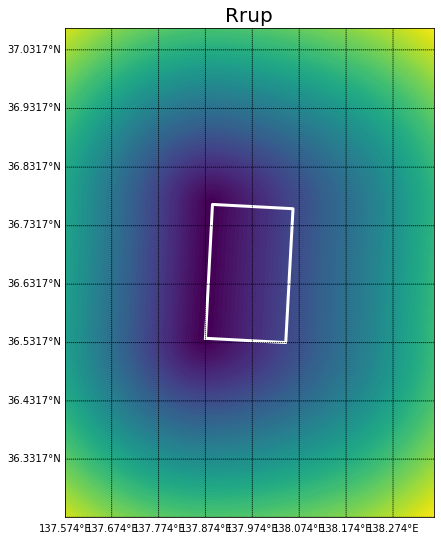

In [62]:
# compute and plot Rrup
r_rup = surf.get_min_distance(mesh)
r_rup = r_rup.reshape(838,788) 
fig = pyplot.figure(figsize=(9, 9))
m.plot(boundary_x, boundary_y, linewidth=3, color='white')
m.contourf(x, y, r_rup, 100)
m.drawparallels(numpy.arange(numpy.min(mesh.lats), numpy.max(mesh.lats), 0.1), labels=[True, False, False, True])
m.drawmeridians(numpy.arange(numpy.min(mesh.lons), numpy.max(mesh.lons), 0.1), labels=[True, False, False, True])
#m.colorbar()
pyplot.title('Rrup', fontsize=20)

In [31]:
help(surf)

Help on PlanarSurface in module openquake.hazardlib.geo.surface.planar object:

class PlanarSurface(openquake.hazardlib.geo.surface.base.BaseSurface)
 |  Planar rectangular surface with two sides parallel to the Earth surface.
 |  
 |  :param strike:
 |      Strike of the surface is the azimuth from ``top_left`` to ``top_right``
 |      points.
 |  :param dip:
 |      Dip is the angle between the surface itself and the earth surface.
 |  
 |  Other parameters are points (instances of
 |  :class:`~openquake.hazardlib.geo.point.Point`) defining the surface
 |  corners in clockwise direction starting from top left corner. Top and
 |  bottom edges of the polygon must be parallel to earth surface and to each
 |  other.
 |  
 |  See :class:`~openquake.hazardlib.geo.nodalplane.NodalPlane` for more
 |  detailed definition of ``strike`` and ``dip``. Note that these parameters
 |  are supposed to match the factual surface geometry (defined by corner
 |  points), but this is not enforced or even 

Text(0.5, 1.0, 'Rjb')

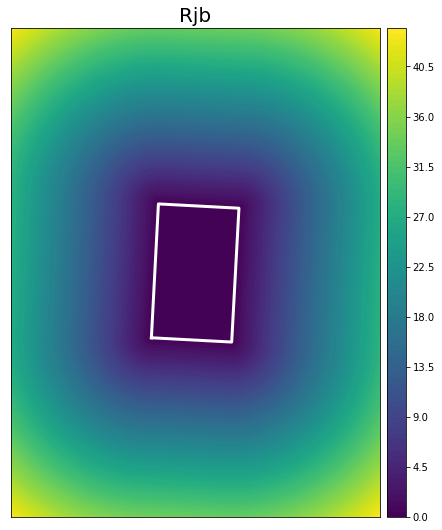

In [63]:

# compute and plot Rjb
r_jb = surf.get_joyner_boore_distance(mesh)

fig = pyplot.figure(figsize=(9, 9))
m.plot(boundary_x, boundary_y, linewidth=3, color='white')
m.contourf(x, y, r_jb, 100)
# m.drawparallels(numpy.arange(numpy.min(mesh.lats), numpy.max(mesh.lats), 0.1), labels=[True, False, False, True])
# m.drawmeridians(numpy.arange(numpy.min(mesh.lons), numpy.max(mesh.lons), 0.1), labels=[True, False, False, True])
m.colorbar()
pyplot.title('Rjb', fontsize=20)

Text(0.5, 1.0, 'Rx')

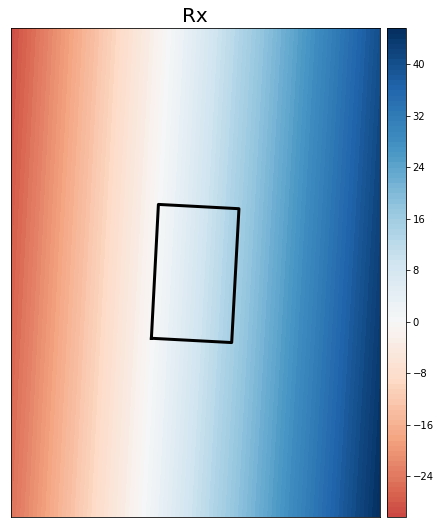

In [64]:
# compute and plot Rx
r_x = surf.get_rx_distance(mesh)

fig = pyplot.figure(figsize=(9,9))
m.plot(boundary_x, boundary_y, linewidth=3, color='black')
m.contourf(x, y, r_x, 100, cmap='RdBu')
# m.drawparallels(numpy.arange(numpy.min(mesh.lats), numpy.max(mesh.lats), 0.1), labels=[True, False, False, True])
# m.drawmeridians(numpy.arange(numpy.min(mesh.lons), numpy.max(mesh.lons), 0.1), labels=[True, False, False, True])
m.colorbar()
pyplot.clim((- numpy.max(r_x), numpy.max(r_x)))
pyplot.title('Rx', fontsize=20)

# Distance to Simple Fault

In [65]:
# create Simple Fault Surface
surf = SimpleFaultSurface.from_fault_data(
    fault_trace=Line([Point(9.21602706445, 45.1555287905), Point(9.25645636929, 45.1877167851),
                  Point(9.29688464252, 45.2199047798), Point(9.35715705075, 45.2398017764),
                  Point(9.42902686305, 45.2401237764), Point(9.47246500782, 45.2381597767),
                  Point(9.51590215304, 45.236194777), Point(9.56736930079, 45.2307927779),
                  Point(9.61883544823, 45.2253897788), Point(9.67030259419, 45.2199877797),
                  Point(9.72270625188, 45.2033947825), Point(9.77510990175, 45.1868007853),
                  Point(9.83238881096, 45.1680237884), Point(9.88966771001, 45.1492457915),
                  Point(9.94694559775, 45.1304687947), Point(10.0042244753, 45.1116907978)]),
    upper_seismogenic_depth=2.,
    lower_seismogenic_depth=7.,
    dip=30.,
    mesh_spacing=4.
)

# get grid of points for which to calculate distances and associated map projection
mesh, m = get_grid_and_map_proj(surf, delta=0.002)
x, y = m(mesh.lons, mesh.lats)

In [78]:
mesh.shape

(414, 698)

In [66]:
# extract coordinates of rupture surface boundary
rup_mesh = surf.mesh
boundary_lons = numpy.concatenate(
    (rup_mesh.lons[0, :], rup_mesh.lons[1:, -1], rup_mesh.lons[-1,:-1][::-1], rup_mesh.lons[:-1, 0][::-1])
)
boundary_lats = numpy.concatenate(
    (rup_mesh.lats[0, :], rup_mesh.lats[1:, -1], rup_mesh.lats[-1,:-1][::-1], rup_mesh.lats[:-1, 0][::-1])
)
boundary_x, boundary_y = m(boundary_lons, boundary_lats)

Text(0.5, 1.0, 'Rrup')

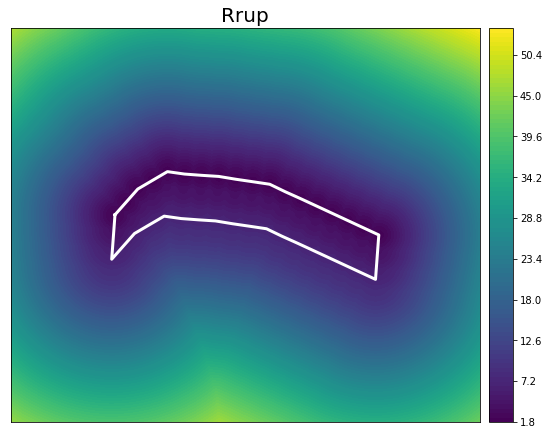

In [67]:
# compute and plot Rrup
r_rup = surf.get_min_distance(mesh)
r_rup = r_rup.reshape(414,698) #modification
fig = pyplot.figure(figsize=(9, 9))
m.plot(boundary_x, boundary_y, linewidth=3, color='white')
m.contourf(x, y, r_rup, 100)
# m.drawparallels(numpy.arange(numpy.min(mesh.lats), numpy.max(mesh.lats), 0.2), labels=[True, False, False, True])
# m.drawmeridians(numpy.arange(numpy.min(mesh.lons), numpy.max(mesh.lons), 0.2), labels=[True, False, False, True])
m.colorbar()
pyplot.title('Rrup', fontsize=20)

In [87]:
# compute and plot Rjb
r_jb = surf.get_joyner_boore_distance(mesh)
fig = pyplot.figure(figsize=(9, 9))
m.plot(boundary_x, boundary_y, linewidth=3, color='white')
m.contourf(x, y, r_jb, 100)
m.drawparallels(numpy.arange(numpy.min(mesh.lats), numpy.max(mesh.lats), 0.2), labels=[True, False, False, True])
m.drawmeridians(numpy.arange(numpy.min(mesh.lons), numpy.max(mesh.lons), 0.2), labels=[True, False, False, True])
#m.colorbar()
pyplot.title('Rjb', fontsize=20)

IndexError: index 414 is out of bounds for axis 0 with size 414

In [74]:
help(surf)

Help on SimpleFaultSurface in module openquake.hazardlib.geo.surface.simple_fault object:

class SimpleFaultSurface(openquake.hazardlib.geo.surface.base.BaseSurface)
 |  Represent a fault surface as regular (uniformly spaced) 3D mesh of points.
 |  
 |  :param mesh:
 |      Instance of :class:`~openquake.hazardlib.geo.mesh.RectangularMesh`
 |      representing surface geometry.
 |  
 |  Another way to construct the surface object is to call
 |  :meth:`from_fault_data`.
 |  
 |  Method resolution order:
 |      SimpleFaultSurface
 |      openquake.hazardlib.geo.surface.base.BaseSurface
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, mesh)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_dip(self)
 |      Return the fault dip as the average dip over the fault surface mesh.
 |      
 |      The average dip is defined as the weighted mean inclination of top
 |      row of mesh cells. See
 |      :meth:`openquake.hazardlib.ge

In [88]:
# compute and plot Rx
r_x = surf.get_rx_distance(mesh)

fig = pyplot.figure(figsize=(9,9))
m.plot(boundary_x, boundary_y, linewidth=3, color='black')
m.contourf(x, y, r_x, 100, cmap='RdBu')
# m.drawparallels(numpy.arange(numpy.min(mesh.lats), numpy.max(mesh.lats), 0.1), labels=[True, False, False, True])
# m.drawmeridians(numpy.arange(numpy.min(mesh.lons), numpy.max(mesh.lons), 0.1), labels=[True, False, False, True])
m.colorbar()
pyplot.clim((- numpy.max(r_x), numpy.max(r_x)))
pyplot.title('Rx', fontsize=20)

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (414,698) (414,) 

In [83]:
a =[1,2,3]
c = a[:-1]
c

[1, 2]